# Laboratorio 7
# Marco Orozco  20857
# Gabriel Vicente Lorenzo 20498

In [4]:
# Librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

c:\Users\Mark\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Cargar conjunto de datos

In [6]:
# Paso 1: Carga del Conjunto de Datos
# Asumiendo que el archivo diabetes.csv está en la misma carpeta que este script
diabetes_df = pd.read_csv('diabetes.csv')

# Visualizar las primeras filas del DataFrame para verificar la carga
print(diabetes_df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Análisis exploratorio

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

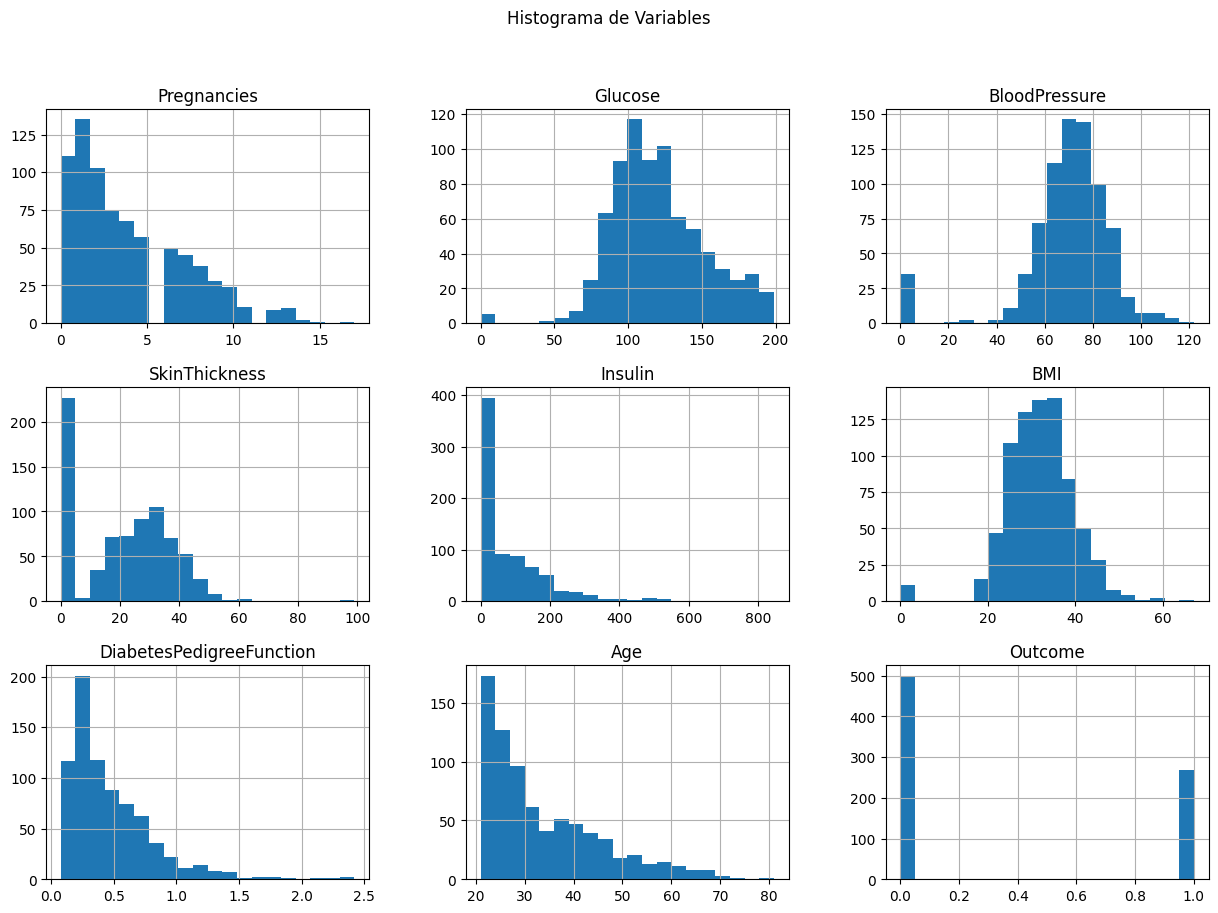

Valores Nulos:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Valores Atípicos:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            NaN      NaN            NaN            NaN      NaN  NaN   
1            NaN      NaN            NaN            NaN      NaN  NaN   
2            NaN      NaN            NaN            NaN      NaN  NaN   
3            NaN      NaN            NaN            NaN      NaN  NaN   
4            NaN      NaN            NaN            NaN      NaN  NaN   
..           ...      ...            ...            ...      ...  ...   
763          NaN      NaN            NaN            NaN      NaN  NaN   
764          NaN      NaN            NaN            NaN      NaN  NaN   
765          NaN      NaN

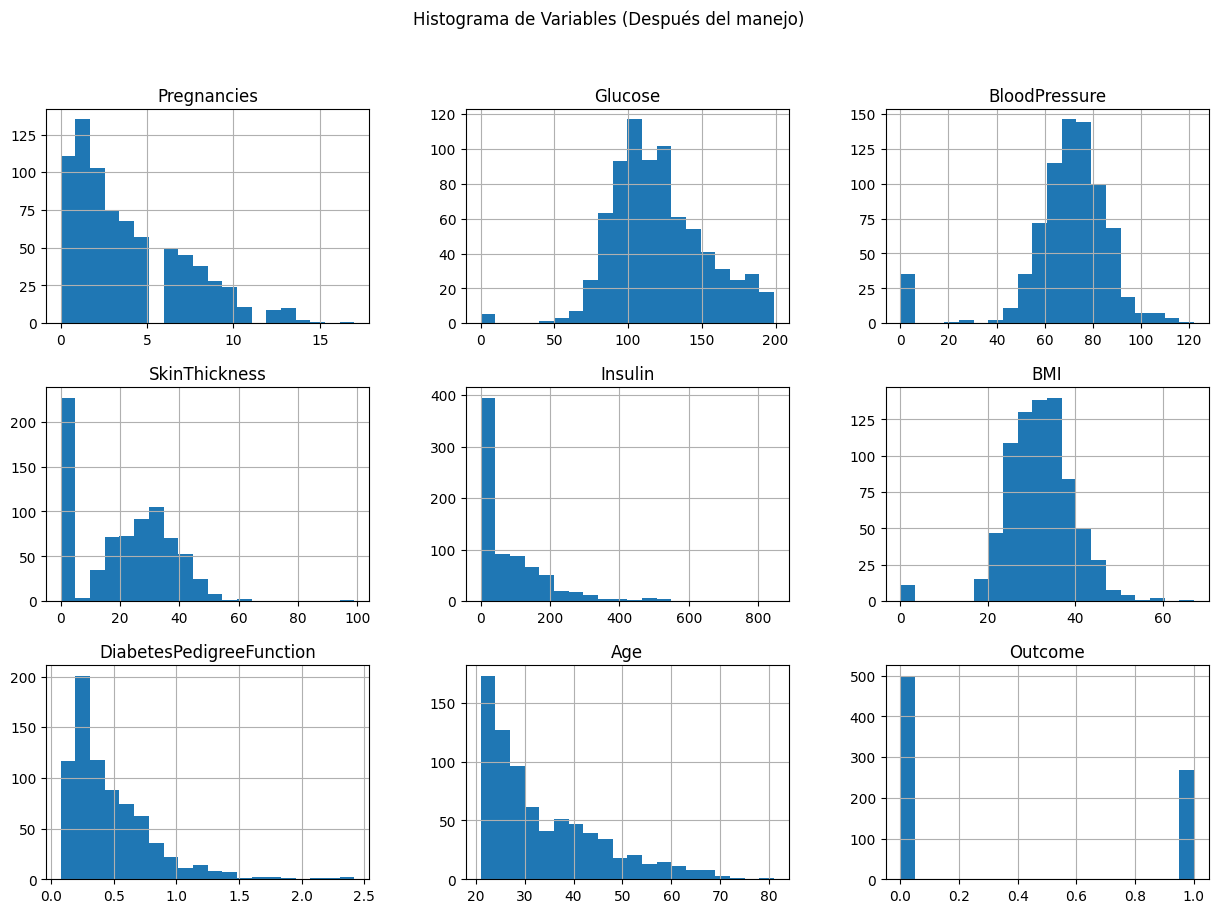

In [8]:
# Paso 1: Obtener estadísticas descriptivas básicas del conjunto de datos
descriptive_stats = diabetes_df.describe()
print(descriptive_stats)

# Paso 2: Visualizar la distribución de las variables
diabetes_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograma de Variables')
plt.show()

# Paso 3: Verificar la presencia de valores nulos o atípicos y decidir cómo manejarlos
# Para valores nulos
null_values = diabetes_df.isnull().sum()
print("Valores Nulos:\n", null_values)

# Para valores atípicos (puedes ajustar el umbral según tus necesidades)
outlier_threshold = 3
outliers = diabetes_df[(diabetes_df - diabetes_df.mean()).abs() > outlier_threshold * diabetes_df.std()]
print("Valores Atípicos:\n", outliers)

# Visualizar nuevamente después de manejar valores nulos o atípicos
diabetes_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograma de Variables (Después del manejo)')
plt.show()

## Entrenamiento con autogluon

In [9]:
# Definir la columna de etiquetas
label_column = 'Outcome'

# Crear un predictor y entrenar modelos con AutoGluon
predictor = TabularPredictor(label=label_column, eval_metric='accuracy').fit(
    train_data=diabetes_df,
    presets='best_quality'  # Utilizar el preset best_quality
)

# Obtener un resumen del rendimiento del modelo en el conjunto de entrenamiento
performance_summary = predictor.fit_summary()

# Imprimir el resumen del rendimiento
print(performance_summary)

No path specified. Models will be saved in: "AutogluonModels\ag-20231015_144038"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=7, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231015_144038"
AutoGluon Version:  0.8.3b20231015
Python Version:     3.11.3
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   26.47 GB / 489.77 GB (5.4%)
Train Data Rows:    768
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feat

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.787760       0.116554  13.075617                0.001490           0.580059            2       True          9
1    NeuralNetTorch_BAG_L1   0.786458       0.044678  12.097277                0.044678          12.097277            1       True          8
2           XGBoost_BAG_L1   0.785156       0.023398   3.681438                0.023398           3.681438            1       True          7
3    ExtraTreesGini_BAG_L1   0.769531       0.071294   0.321914                0.071294           0.321914            1       True          5
4    ExtraTreesEntr_BAG_L1   0.765625       0.070615   0.355906                0.070615           0.355906            1       True          6
5  RandomForestGini_BAG_L1   0.764323       0.077880   0.831266                0.07788

## Evaluación del modelo

In [13]:
# Obtener el leaderboard de los modelos
leaderboard = predictor.leaderboard(extra_info=True)

# Imprimir el leaderboard
print(leaderboard)


                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order  num_features  num_models  num_models_w_ancestors  memory_size  memory_size_w_ancestors  memory_size_min  memory_size_min_w_ancestors  num_ancestors  num_descendants             model_type             child_model_type                                    hyperparameters hyperparameters_fit                                        ag_args_fit                                           features compile_time                              child_hyperparameters             child_hyperparameters_fit                                  child_ag_args_fit                                         ancestors            descendants
0      WeightedEnsemble_L2   0.787760       0.116554  13.075617                0.001490           0.580059            2       True          9             2           1                       9         3619                  7841476            

In [18]:
# Obtener el mejor modelo
best_model = leaderboard["model"][0]

print(best_model)

WeightedEnsemble_L2


## Reflexión

AutoGluon es una herramienta de AutoML que facilita la creación de modelos de aprendizaje automático de alta calidad.

En un ejercicio de predicción de diabetes, AutoGluon logró un modelo con una precisión del 0.78%. El cual fue WeightedEnsemble_L2

AutoGluon automatiza la selección de modelos y el ajuste de hiperparámetros, lo que simplifica el proceso.

Sin embargo, la automatización completa de AutoGluon puede limitar la comprensión profunda de los modelos.

En resumen, AutoGluon es una herramienta poderosa. es importante comprender los fundamentos de aprendizaje automático y estadística para poder interpretar los resultados de AutoGluon. Pero no cabe duda que es una gran ayuda que aautomatiza mucho del proceso de cosntrucción